<a href="https://colab.research.google.com/github/brazadrian/teachers_salaries_oecd/blob/main/teacher's_salaries_oecd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando os salários dos professores (especialmente do ensino infantil) nos países da OCDE
---

## O que é a OCDE?

A OCDE, sigla para Organização para a Cooperação e Desenvolvimento Econômico, é uma organização internacional composta por 38 países-membros, a maioria dos quais são nações industrializadas.

---


## Por que é importante analisar o salário de professores?

**Relevância educacional**, tendo em vista a importância destes valores no campo educacional: entender as tendências salariais ao longo do tempo pode fornecer insights importantes para o setor educacional.

**Políticas Públicas**, pois os salários dos professores refletem as decisões de financiamento na educação: pode-se entender como as políticas afetam o ganho dos educadores.

**Impacto na Qualidade da Educação**, porque salários justos são fundamentais para atrair e reter bons professores. Esta base poderá ser usada para avaliar se os salários estão em linha com a experiência dos professores.

**Análise de Tendências Temporais**, a observação dos dados ao longo dos anos permite analisar tendências salariais ao longo do tempo, identificando se há aumento, diminuição ou estabilidade nos salários.

---

## Breve explicação sobre o conjunto de dados


Este conjunto de dados fornece uma série temporal que permite acompanhar as mudanças nos salários dos professores. Através de análises estatísticas e gráficos de tendência, é possível identificar como esses salários evoluíram ao longo dos anos e se houve variações significativas.

Além disso, esse conjunto de dados também pode ser usado para comparar os salários dos professores com outras métricas, como inflação, custo de vida ou o desempenho dos alunos, para entender melhor a relação entre o salário dos professores e outros fatores educacionais.

Em resumo, este dataset oferece uma oportunidade valiosa para estudar os salários dos professores e suas implicações no contexto da educação e das políticas públicas.

## Importando as bibliotecas

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## Carregamento e análise de dados

In [ ]:
# Importnado o arquivo (tem que ser anexado)
from google.colab import drive

data_path = 'Teachers\' salaries.csv'

df = pd.read_csv(data_path)

Visão geral o DataFrame:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    4652 non-null   object 
 1   INDICATOR   4652 non-null   object 
 2   SUBJECT     4652 non-null   object 
 3   MEASURE     4652 non-null   object 
 4   FREQUENCY   4652 non-null   object 
 5   TIME        4652 non-null   int64  
 6   Value       4652 non-null   float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 290.9+ KB


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Valores únicos na coluna {column}:')
    print(unique_values)
    print('-' * 30)

Valores únicos na coluna LOCATION:
['AUS' 'AUT' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL' 'IRL'
 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK' 'ESP'
 'SWE' 'CHE' 'TUR' 'USA' 'BRA' 'CHL' 'EST' 'ISR' 'SVN' 'COL' 'CRI' 'LVA'
 'LTU' 'OAVG' 'SAU' 'ZAF']
------------------------------
Valores únicos na coluna INDICATOR:
['TEACHERSALARY']
------------------------------
Valores únicos na coluna SUBJECT:
['PRY15YREXP' 'PRY_START' 'PRY_TOP' 'LOWSRY_15YREXP' 'UPPSRY_15YREXP'
 'LOWSRY_START' 'UPPSRY_START' 'UPPSRY_TOP' 'LOWSRY_TOP'
 'EARLYCHILDEDU_15YREXP' 'EARLYCHILDEDU_START' 'EARLYCHILDEDU_TOP']
------------------------------
Valores únicos na coluna MEASURE:
['USD' 'IDX2010']
------------------------------
Valores únicos na coluna FREQUENCY:
['A']
------------------------------
Valores únicos na coluna TIME:
[2010 2011 2012 2013 2014 2015 2017 2018 2019 2020 2021 2016 2009 2005
 2006 2007 2008 2000]
------------------------------
Valores únicos na coluna Value:


## Limpeza dos dados

In [ ]:
# Base de dados original
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,TEACHERSALARY,PRY15YREXP,USD,A,2010,48589.523,NaN
1,AUS,TEACHERSALARY,PRY15YREXP,USD,A,2011,50935.136,NaN
2,AUS,TEACHERSALARY,PRY15YREXP,USD,A,2012,52544.292,NaN
3,AUS,TEACHERSALARY,PRY15YREXP,USD,A,2013,56356.420,NaN
4,AUS,TEACHERSALARY,PRY15YREXP,USD,A,2014,58050.059,NaN


- Exclusões:
 - A coluna **Flag Codes** não contém dados, portanto será *excluída*.

 - Bem como as colunas **Frequency** e **Indicator** têm todas as linhas registradas com um único dado repetido, quais sejam, respectivamente: **"A"** e **"TEACHERSALARY"**, não apresentando impacto para a análise.

- Renomeação:
 - A coluna **Value** será renomeada para **VALUE**, para adequação com o restante dos nomes das colunas.

In [ ]:
# Exclusão da coluna "Flag Codes"
df = df.drop("Flag Codes", axis=1)

# Exclusão da coluna "FREQUENCY"
df = df.drop("FREQUENCY", axis=1)

# Exclusão da coluna "INDICATOR"
df = df.drop("INDICATOR", axis=1)

# Renomeando a coluna "Value" para "VALUE"
df = df.rename(columns={'Value' : "VALUE"})

Visualização das primeiras amostras

In [ ]:
# Base de dados após tratamento
df.head()

,LOCATION,SUBJECT,MEASURE,TIME,VALUE
0,AUS,PRY15YREXP,USD,2010,48589.523
1,AUS,PRY15YREXP,USD,2011,50935.136
2,AUS,PRY15YREXP,USD,2012,52544.292
3,AUS,PRY15YREXP,USD,2013,56356.420
4,AUS,PRY15YREXP,USD,2014,58050.059


Obtendo as estatísticas resumidas das colunas numéricas:

In [ ]:
df.describe()

,TIME,VALUE
count,4652.000000,4652.000000
mean,2015.653052,26203.240143
std,4.583022,27197.907883
min,2000.000000,51.635900
25%,2013.000000,101.591500
50%,2017.000000,24757.583000
75%,2019.000000,44269.444000
max,2021.000000,146568.240000


Verificando se existem dados sobre o Brasil na base analisada:

In [ ]:
# Filtrando por LOCATION 'BRA'
df_bra = df[df['LOCATION'] == 'BRA']

# Imprimindo a lista
df_bra

,LOCATION,SUBJECT,MEASURE,TIME,VALUE
587,BRA,PRY_START,USD,2017,13881.584
588,BRA,PRY_START,USD,2018,13983.060
589,BRA,PRY_START,USD,2019,14344.895
2692,BRA,LOWSRY_START,USD,2017,13881.584
2693,BRA,LOWSRY_START,USD,2018,13983.060
2694,BRA,LOWSRY_START,USD,2019,14344.895
2695,BRA,EARLYCHILDEDU_START,USD,2017,13881.584
2696,BRA,EARLYCHILDEDU_START,USD,2018,13983.060
2697,BRA,EARLYCHILDEDU_START,USD,2019,14344.895
2728,BRA,UPPSRY_START,USD,2017,13881.584


## Gráficos

Gráfico dos anos em que não houve variação no salário dos professores em relação ao ano de 2010.

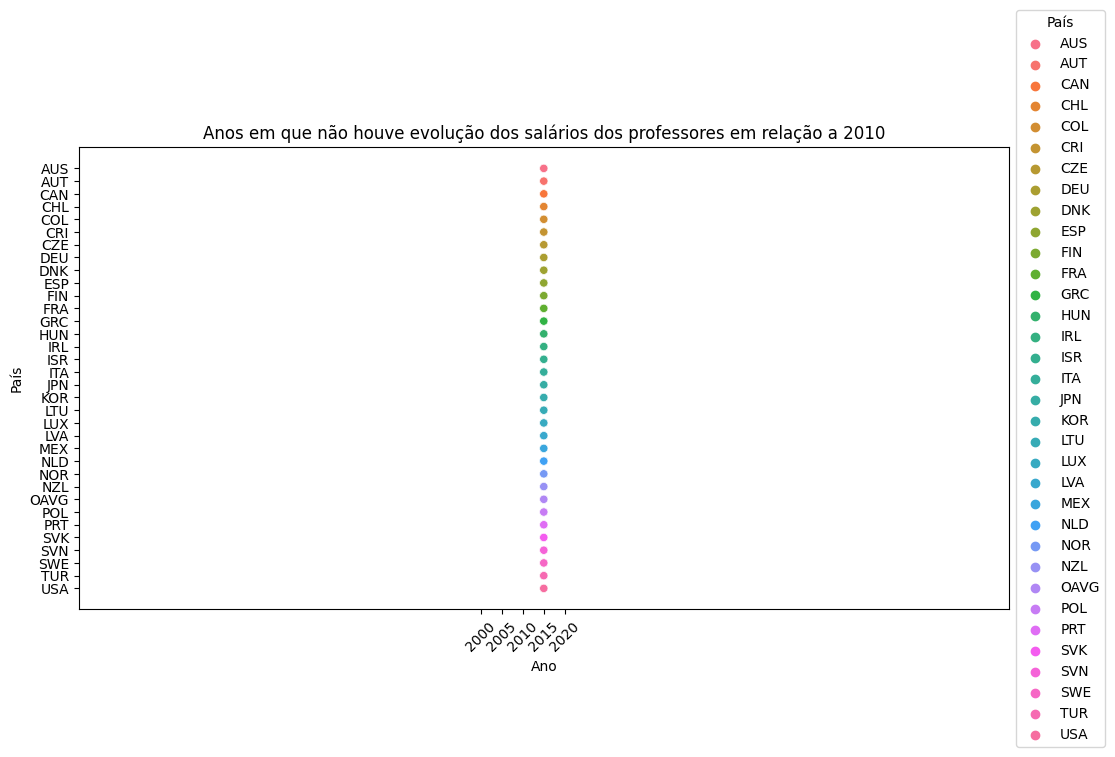

In [ ]:
# Filtrar os dados onde VALUE é igual a 100
filtered_data = df[df['VALUE'] == 100]

# Ordenar os países por ordem alfabética
filtered_data = filtered_data.sort_values(by='LOCATION')

# Criar um gráfico de barras para mostrar os países e anos com VALUE igual a 100
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TIME', y='LOCATION', data=filtered_data, hue='LOCATION')
plt.title('Anos em que não houve evolução dos salários dos professores em relação a 2010')
plt.xlabel('Ano')
plt.ylabel('País')
plt.legend(title='País', loc='center left', bbox_to_anchor=(1, 0.5))

# Restringindo as labels do eixo x para o intervalo de 2000 a 2021
plt.xticks(range(2000, 2023, 5), rotation=45)

# Mostrar gráfico
plt.show()

O "IDX2010" é um índice que serve como ponto de referência para analisar a evolução dos salários ao longo do tempo em relação a 2010, que é o ano base com um índice definido como 100. Quando o índice é igual a 100, significa que os salários médios permaneceram inalterados em comparação com 2010.

Portanto, no caso específico dos salários dos professores, podemos observar que o ano de 2015 representou um ponto notável, pois as médias salariais naquele ano se igualaram aos níveis de 2010, indicando que, após um período de flutuações, os salários retornaram ao mesmo nível que tinham em 2010.

Ou, numa análise mais crítica, que houve algum problema na coleta de dados por parte da OCDE no referido ano.

---

Criando gráfico de linha para avaliar a tendência do salário dos professores do ensino infantil (EARLYCHILDEDU) ao longo do tempo:

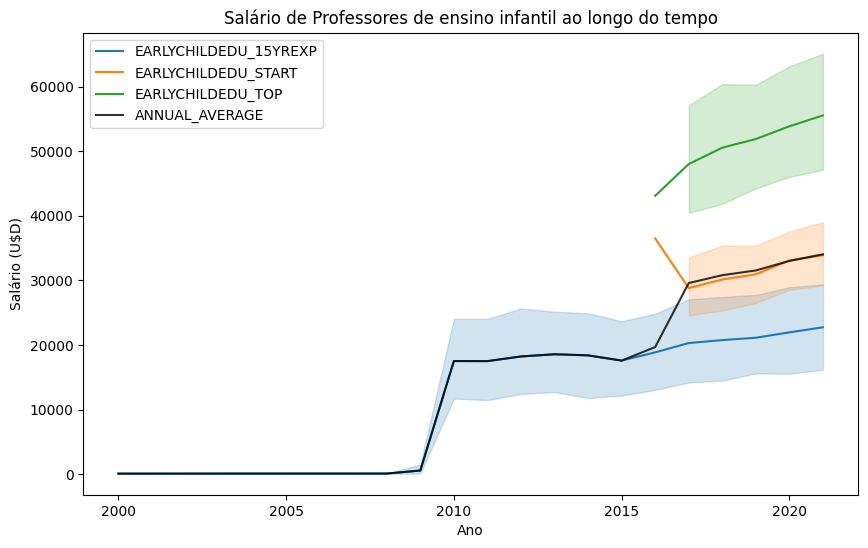

In [ ]:
# Filtrar os dados onde SUBJECT é igual a EARLYCHILDEDU_15YREXP, EARLYCHILDEDU_TOP ou EARLYCHILDEDU_START
filtered_data = df[(df['SUBJECT'] == "EARLYCHILDEDU_START") | (df['SUBJECT'] == "EARLYCHILDEDU_15YREXP") | (df['SUBJECT'] == "EARLYCHILDEDU_TOP")]

# Calcular a média anual do salário
average_salary = filtered_data.groupby('TIME')['VALUE'].mean().reset_index()

# Criar um gráfico de linha para mostrar os o salário dos professores do ensino infantil ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='TIME', y='VALUE', data=filtered_data, hue='SUBJECT')
sns.lineplot(x='TIME', y='VALUE', data=average_salary, label='ANNUAL_AVERAGE', color='black', alpha= 0.8) # Linha da média
plt.title('Salário de Professores de ensino infantil ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Salário (U$D)')

# Mostrar o gráfico
plt.show()


O gráfico que estamos analisando exibe informações sobre a área de educação infantil, especificamente relacionadas a diferentes níveis de experiência nesse campo. Ele inclui três categorias distintas: EARLYCHILDEDU_START, EARLYCHILDEDU_TOP e EARLYCHILDEDU_15YREXP, cada uma representando um estágio diferente de experiência do professor na educação infantil.

A categoria EARLYCHILDEDU_START provavelmente se refere ao início da carreira na educação infantil, indicando o salário médio dos educadores nessa fase inicial.

Por outro lado, EARLYCHILDEDU_TOP sugere o ponto mais alto da carreira, onde os educadores atingiram um nível avançado de experiência e, consequentemente, uma remuneração mais elevada.

Por fim, EARLYCHILDEDU_15YREXP aponta para um ponto intermediário, representando o salário médio de educadores com aproximadamente 15 anos de experiência na educação infantil.

É interessante observar o comportamento contra-intuitivo entre o salário de professor com 15 anos de experiência e professor iniciantes: professores iniciantes, recebem em média mais que professores mais experientes.

---

Considerando o gráfico anterior, decidiu-se realizar a observação do salário dos professores no ano de 2021 a fim de aferir a divergência salarial entre professores iniciantes e com 15 anos de experiência do ensino infantil:

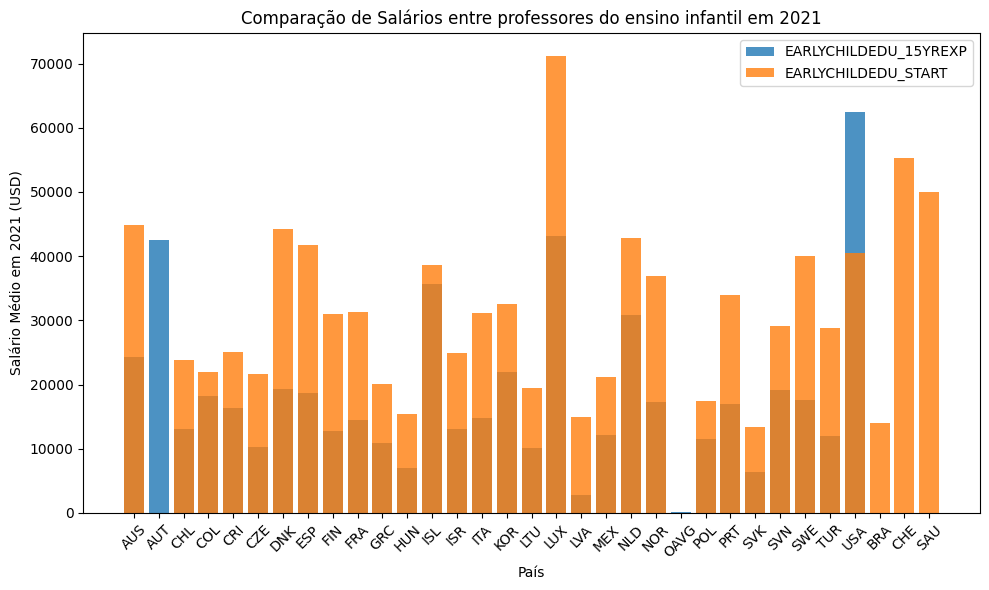

In [ ]:
# Filtrando os dados para incluir apenas o ano de 2021
df_2021 = df[df['TIME'] == 2021]

# Filtrando os dados para incluir apenas a categoria de professores do fundamental iniciantes e com 15 anos de experiência
df_2021 = df[(df['SUBJECT'] == "EARLYCHILDEDU_START") | (df['SUBJECT'] == "EARLYCHILDEDU_15YREXP")]

# Agrupando por país e tipo de professor, e calculando a média dos salários
df_grouped = df_2021.groupby(['LOCATION', 'SUBJECT'])['VALUE'].mean().reset_index()

# Criando um gráfico de barras para comparar os salários
plt.figure(figsize=(10, 6))

# Iterando sobre os diferentes tipos de professores
for subject in df_grouped['SUBJECT'].unique():
    data = df_grouped[df_grouped['SUBJECT'] == subject]
    plt.bar(data['LOCATION'], data['VALUE'], label=subject, alpha=0.8)


plt.xlabel('País')
plt.ylabel('Salário Médio em 2021 (USD)')
plt.title('Comparação de Salários entre professores do ensino infantil em 2021')
plt.legend()
plt.xticks(rotation=45)

# Mostrando o gráfico
plt.tight_layout()
plt.show()

É interessante observar que apenas Áustria (AUT) e Estados Unidos da América (USA) têm salários em que professor com 15 anos de experiência superam o salário dos professore siniciantes no ensino infantil, o que justifica a aferição no gráfico anterior.

Também é importante destacar que muitos países têm a diferença de salário muito grande, demonstrando a desvalorização de professores experientes: a causa deste fenômeno não está clara no contexto da base de dados, ou de pesquisas acadêmicas, mas trata-se de uma curiosidade importante de se observar.

---

A fim de aproveitar e observar o cenário nacional, o seguinte gráfico servirá par observar a evolução do salário médio dos professores no território brasileiro:

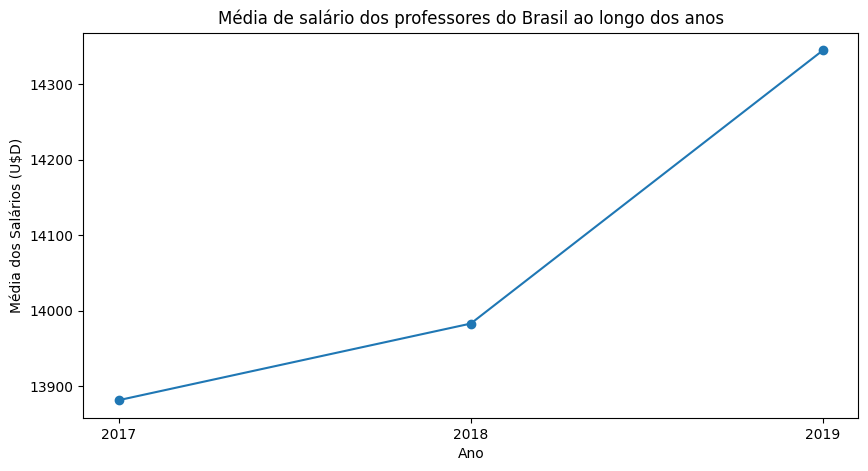

In [ ]:
# Agrupando por TIME e calculando a média do VALUE
df_agrupado = df_bra.groupby('TIME')['VALUE'].mean().reset_index()

# Criando o gráfico de linha
plt.figure(figsize=(10, 5))  # Ajuste o tamanho conforme necessário
plt.plot(df_agrupado['TIME'], df_agrupado['VALUE'], marker='o')

# Adicionando título e legendas
plt.title('Média de salário dos professores do Brasil ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Média dos Salários (U$D)')

# Ajustando os ticks no eixo x para mostrar os anos como inteiros
plt.xticks(df_agrupado['TIME'].astype(int))

plt.show()


É possível observar que, houve um aumento no salário médio dos professores no Brasil. O que não necessariamente signifique um ganho real, pela ausência, nesta análise, de dados macroeconômicos do país para melhor elucidar a presente análise

## Conclusão

Os dados revelam disparidades significativas nos salários dos professores do ensino infantil ao redor do mundo, destacando as regiões da Europa e América do Norte como aquelas com os rendimentos mais elevados, enquanto na África, os salários são notadamente mais baixos. Essas discrepâncias podem remeter a uma ponderável influência sobre a qualidade da educação infantil em diferentes nações. Os países que investem em salários mais atrativos para os professores do ensino infantil tendem a atrair profissionais mais qualificados, o que, por sua vez, poderá resultar em um ensino de maior qualidade. O que só poderá ser observado numa análise futura, que poderá fazer uso dos dados do Programa Internacional de Avaliação de Alunos (PISA), realizado pela OCDE.

Com o aumento gradual dos salários dos professores no Brasil ao longo dos anos, é importante ponderar sobre a possível evolução da inflação e seu impacto no poder de compra. Embora os valores tenham registrado um crescimento positivo, é crucial considerar que a inflação também pode ter avançado nesse período. Portanto, é fundamental analisar se o aumento salarial foi capaz de acompanhar e superar a taxa de inflação, garantindo assim que o poder de compra dos profissionais não tenha sido erodido. A manutenção do poder aquisitivo dos professores é essencial para assegurar não apenas o bem-estar financeiro, mas também a motivação e o comprometimento desses profissionais com a sua nobre missão na educação infantil.

Em vez de se limitar a recomendações, propõe-se um plano de ação holístico. Para promover uma educação infantil de alta qualidade no Brasil, é crucial:

- Aumento dos salários dos professores do ensino infantil é considerado primordial. Isso não apenas atrairá profissionais mais capacitados, mas também incentivará o desenvolvimento contínuo na carreira educacional.

- Investimento em infraestrutura e recursos adequados nas escolas, bem como na redução da carga de trabalho dos professores, é considerado fundamental para criar um ambiente de ensino mais eficaz e saudável.

- A oferta de oportunidades de treinamento e aprimoramento profissional para os educadores garantirá que eles estejam atualizados com as melhores práticas de ensino.

- A implementação de programas de apoio psicológico e emocional para professores pode ajudar a lidar com o estresse e o desgaste, resultando em um ambiente de trabalho mais saudável.

- O envolvimento de pais e comunidades na educação infantil é considerado uma forma de fortalecer o apoio às escolas e ajudar a criar um ambiente de aprendizado mais abrangente.

Essas medidas abrangentes não apenas elevarão a qualidade da educação infantil, mas também proporcionarão um ambiente mais atrativo para os educadores, incentivando um maior interesse e dedicação à profissão. Garantir uma educação infantil de qualidade é essencial para o desenvolvimento e sucesso das crianças brasileiras, preparando-as para um futuro brilhante.

# Referências



OECD (2023), Teachers' salaries (indicator). doi: 10.1787/f689fb91-en (Accessed on 09 October 2023), https://data.oecd.org/teachers/teachers-salaries.htm.

OECD (2023), Education at a Glance 2023: OECD Indicators, OECD Publishing, Paris, https://doi.org/10.1787/e13bef63-en.